In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


## Processamento de Linguagem Natural com PyTorch

Tudo o que expressamos (verbalmente ou por escrito) carrega enormes quantidades de informação. O tópico que escolhemos, nosso tom, nossa seleção de palavras, tudo acrescenta algum tipo de informação que pode ser interpretada e com o valor extraído dela. Em teoria, podemos entender e até prever o comportamento humano usando essas informações.

Mas há um problema: uma pessoa pode gerar centenas ou milhares de palavras em uma declaração, cada sentença com sua complexidade correspondente. Se você deseja dimensionar e analisar várias centenas, milhares ou milhões de pessoas ou declarações em uma determinada região, a situação é incontrolável.

Dados gerados a partir de conversas, declarações ou até tweets são exemplos de dados não estruturados. Os dados não estruturados não se encaixam perfeitamente na estrutura tradicional de linhas e colunas de bancos de dados relacionais e representam a grande maioria dos dados disponíveis no mundo real. É confuso e difícil de manipular. 

No entanto, graças aos avanços em disciplinas como aprendizado de máquina, uma grande revolução está acontecendo em relação a esse tópico. Atualmente, não se trata mais de tentar interpretar um texto ou discurso com base em suas palavras-chave (a maneira mecânica antiquada), mas de entender o significado por trás dessas palavras (a maneira cognitiva). Dessa forma, é possível detectar figuras de linguagem como ironia, ou mesmo realizar análises de sentimentos.

O Processamento de Linguagem Natural ou PLN é um campo da Inteligência Artificial que oferece às máquinas a capacidade de ler, entender e derivar significado das linguagens humanas.

É uma disciplina que se concentra na interação entre ciência de dados e linguagem humana e está sendo dimensionada para vários setores. Hoje, o PLN está crescendo graças às enormes melhorias no acesso aos dados e ao aumento do poder computacional, que estão permitindo que os profissionais obtenham resultados significativos em áreas como assistência médica, mídia, finanças e recursos humanos, entre outras.

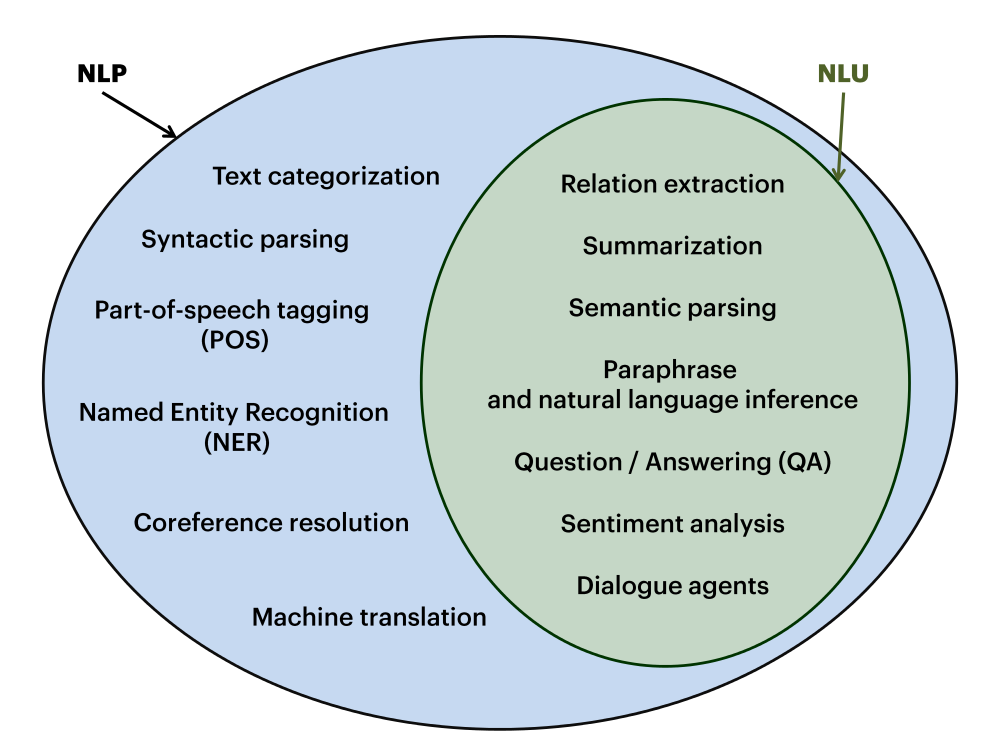

In [2]:
from IPython.display import Image
Image("imagens/nlu_nlp.png", width = 800, height = 800)

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# Imports
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy: 1.19.5
torch: 1.10.1



### Como Representar Sentenças ou Tokens?

O que é uma frase (sentença)? Uma frase pode ser vista como uma sequência de tokens de tamanho variável. Cada token pode ser qualquer um de um vocabulário.

É muito parecido com falar. Por exemplo, "a veloz raposa marrom saltou sobre o cachorro preguiçoso" pode ser visto como uma lista "\[a, veloz, raposa, marrom, saltou, sobre, o, cachorro, preguiçoso\]". 

$$X=(x_1, x_2, \cdots, x_t ,\cdots,x_T) \quad onde\ x_t \in V$$ 

Assim, a sentença $X$ se torna uma sequênciia de tokens, e $V$ é um conjunto de vocabulário que é o total de tokens exclusivos nos dados de treinamento.

A unidade do token não importa, você pode tentar unidades como palavras, sequências de caracteres ou mesmo bits de dígitos. Aqui consideramos uma "palavra" como nossa unidade de token.

Como o computador não consegue entender "palavras", alteramos as palavras para índices de valores numéricos.

Após codificada, essa frase pode ser representada como **uma sequência de valores numéricos**.

In [5]:
# Exemplo

# Fazendo o split da frase pelo caracter espaço
sentence = "a veloz raposa marrom saltou sobre o cachorro preguiçoso".split()
sentence

['a',
 'veloz',
 'raposa',
 'marrom',
 'saltou',
 'sobre',
 'o',
 'cachorro',
 'preguiçoso']

In [6]:
# Vamos criar o vocabulário
vocab = {}

# Para cada token na sequência, armazenamos o token em nosso vocabulário
for token in sentence:
    if vocab.get(token) is None:
        vocab[token] = len(vocab)

vocab

{'a': 0,
 'veloz': 1,
 'raposa': 2,
 'marrom': 3,
 'saltou': 4,
 'sobre': 5,
 'o': 6,
 'cachorro': 7,
 'preguiçoso': 8}

In [7]:
# Agora fazemos o mapeamento para buscar cada token na sentença  
sentence_transformed = list(map(vocab.get, sentence))

In [8]:
# E aqui está o resultado:
sentence_transformed

[0, 1, 2, 3, 4, 5, 6, 7, 8]

#### One-Hot Encoding

Outro método para representar um token é chamado **"representação quente"** ou **One-Hot Encoding**. 

Cada token possui o mesmo tamanho de vocabulário e apenas um dos elementos é 1 no índice de vocabulário.

Por exemplo: O token "a" possui o índice 0 em nosso vocabulário. Assim:

$$a = [1, 0, 0, 0, 0, 0, 0, 0, 0]$$

Já o token "veloz", seria representado assim:

$$veloz = [0, 1, 0, 0, 0, 0, 0, 0, 0]$$

Vejamos como aplicar o One-Hot Encoding com NumPy.

In [9]:
len(vocab)

9

In [10]:
# Criandoo representação One-Hot Encoding
one_hot = np.eye(len(vocab), dtype = np.int)
one_hot

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [11]:
vocab['a']

0

In [12]:
# One-Hot Encoding para o token "a"
print('\nO índice do token "a" no vocabulário é:', vocab['a'])
print('Vetor One-hot:', one_hot[vocab['a']])

# One-Hot Encoding para o token "veloz"
print('\nO índice do token "veloz" no vocabulário é:', vocab['veloz'])
print('Vetor One-hot:', one_hot[vocab['veloz']])


O índice do token "a" no vocabulário é: 0
Vetor One-hot: [1 0 0 0 0 0 0 0 0]

O índice do token "veloz" no vocabulário é: 1
Vetor One-hot: [0 1 0 0 0 0 0 0 0]


No entanto, essas representações numéricas são arbitrárias e não podem capturar o "significado" das palavras.

**O que é "significado (semântico)" de uma palavra?**

Existem algumas hipóteses no Processamento de Linguagem Natural. As definições abaixo foram extraídas do paper ["From Frequency to Meaning: Vector Space Models of Semantics"](https://arxiv.org/abs/1003.1141)

>**Statistical Semantics Hypothesis**: Os padrões estatísticos do uso de palavras humanas podem ser
usados para descobrir o que as pessoas querem dizer. Se unidades de texto tiverem vetores semelhantes em uma matriz de frequência de texto, eles tendem a ter significados semelhantes (consideramos que essa é uma hipótese geral que inclui as quatro hipóteses mais específicas a seguir).
>
>**1-Bag of Words Hypothesis**: As frequências de palavras em um documento tendem a indicar a relevância do documento para uma consulta. Se documentos e pseudodocumentos (consultas) têm vetores de coluna semelhantes em uma matriz termo-documento, eles tendem a ter significados semelhantes.
>
>**2-Distributional Hypothesis**: Palavras que ocorrem em contextos semelhantes tendem a ter significados semelhantes. Se as palavras tiverem vetores de linha semelhantes em uma matriz de contexto de palavras, elas tendem a ter significados semelhantes.
>
>**3-Extended Distributional Hypothesis**: Padrões que ocorrem com pares semelhantes tendem ter significados semelhantes. Se os padrões tiverem vetores de coluna semelhantes em uma matriz de padrão de pares, eles tendem a expressar relações semânticas semelhantes.
>
>**4-Latent Relation Hypothesis**: Pares de palavras que ocorrem em padrões semelhantes tendem a ter relações semânticas semelhantes. Se pares de palavras tiverem linhas semelhantes em vetores, em uma matriz de padrão de pares, eles tendem a ter relações semânticas semelhantes.

De acordo com essas hipóteses, podemos definir que o significado de uma palavra pode ser representado como um vetor. Além disso, vetores similares têm significados semelhantes, o que significa que a distância entre dois vetores será mais próxima. 

A **Similaridade de Cosseno** (ou Cosine similarity) é uma medida de semelhança entre dois vetores diferentes de zero de um espaço interno do produto que mede o cosseno do ângulo entre eles. E assim, medimos a semelhança do significado entre duas palavras.

In [13]:
# Função para medir similaridade
def cos_similiarity(x, y):
    return (np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))).round(5)

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html

Esta função é capaz de retornar uma das oito normas matriciais diferentes ou uma de um número infinito de normas vetoriais, dependendo do valor do parâmetro ord.

In [14]:
# Lista de tokens da frase
print(sentence)

['a', 'veloz', 'raposa', 'marrom', 'saltou', 'sobre', 'o', 'cachorro', 'preguiçoso']


In [15]:
# Matiz One-Hot
print(one_hot)

[[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]


In [16]:
# Vamos definir duas palavras como vetores One-Hot

# One-Hot array([0, 0, 1, 0, 0, 0, 0, 0, 0])
palavra1 = one_hot[vocab['raposa']]  

# One-Hot array([0, 0, 0, 0, 0, 0, 0, 1, 0])
palavra2 = one_hot[vocab['cachorro']]  

In [17]:
# Medindo a similaridade
print('A similaridade cosine entre a palavra "raposa" e a palavra "cachorro" é:', cos_similiarity(palavra1, palavra2))

A similaridade cosine entre a palavra "raposa" e a palavra "cachorro" é: 0.0


Por que a distância é zero? Porque todas as representações One-Hot têm a mesma distância "0" ao usar a similaridade cosine.

Então, como devemos representar um token para que ele reflita seu "significado"? 

Se queremos calcular alguma semelhança, precisamos usar vetores densos para representar essas palavras. Os vetores one-hot são **vetores esparsos**, que contêm muitos zeros. Veja um exemplo usando matrizes densas:

In [18]:
# Exemplo
vec1 = np.array([1, 2, 3, 4])
vec2 = np.array([1, 2, 3, 5])

In [19]:
print(vec1)

[1 2 3 4]


In [20]:
print(vec2)

[1 2 3 5]


In [21]:
print('A similaridade cosine entre "vec1" e "vec2" é:', cos_similiarity(vec1, vec2))

A similaridade cosine entre "vec1" e "vec2" é: 0.994


Então, como resolvemos isso? 

Podemos assumir que há um espaço vetorial ($\Bbb{R}^{\vert V \vert \times d} $) que pode representar esses tokens. Treinamos esse espaço vetorial na rede neural para resolver um problema de classificação. Esse espaço vetorial capturará o significado do token. Esse processo pode ser feito por uma simples multiplicação de matrizes. Vamos chamar o espaço vetorial de representação de palavras como $W$, cujo tamanho é $(\vert V \vert, d)$, como alteramos os tokens para um vetor one-hot, ao multiplicarmos a matriz, podemos obter um vetor de linha única de $W$$(w_i)$ e esse vetor será o significado da palavra.

$$w_i = t_i \cdot W , \quad where\ t_i = [0, \cdots, \underset{i\text{-}th\ index}{1}, \cdots, 0],\ len(t_i)=\vert V \vert$$

In [22]:
# Exemplo

# Shape para o espaço vetorial
dim = 5

# Vamos criar o espaço vetorial (uma matriz) com valores randômicos a partir do nosso vocabulário
W = np.random.rand(len(vocab), dim).round(3)

In [23]:
# Print
print('\nEspaço vetorial para todos os tokens, tamanho de (len(vocab), dim)')
print(W)


Espaço vetorial para todos os tokens, tamanho de (len(vocab), dim)
[[0.861 0.913 0.6   0.85  0.694]
 [0.776 0.378 0.746 0.29  0.172]
 [0.111 0.291 0.241 0.864 0.461]
 [0.46  0.166 0.051 0.16  0.799]
 [0.567 0.635 0.105 0.262 0.069]
 [0.15  0.001 0.427 0.741 0.304]
 [0.206 0.879 0.739 0.28  0.069]
 [0.14  0.944 0.237 0.458 0.858]
 [0.323 0.634 0.436 0.877 0.552]]


In [24]:
# Matriz densa
print('\nUma representação vetorial densa para a palavra "raposa":\n')

# Representação one-hot do token "raposa" = array([0, 0, 1, 0, 0, 0, 0, 0])

# Vetor 1D para a palavra "raposa" = (1,9) ou (9,)
# Matriz 2D para o espaço vetorial = (9,5)

# Resultado com np.dot = vetor(1,5)

# Representação densa do token "raposa":
resultado = np.dot(palavra1, W)
print(resultado)


Uma representação vetorial densa para a palavra "raposa":

[0.111 0.291 0.241 0.864 0.461]


Na prática, obtemos apenas o índice do vetor de linha do espaço vetorial $W$.

In [25]:
# Lista de tokens da frase
print(sentence)

['a', 'veloz', 'raposa', 'marrom', 'saltou', 'sobre', 'o', 'cachorro', 'preguiçoso']


In [26]:
# Matiz One-Hot
print(one_hot)

[[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]


In [27]:
# Obtém os índices das palavras que queremos comparar
idxes = [np.argmax(v) for v in [palavra1, palavra2]]
print('\nÍndices das palavras "raposa" e "cachorro" é {}'.format(idxes))


Índices das palavras "raposa" e "cachorro" é [2, 7]


In [28]:
# Agora usamos os índices para buscar cada Row Vector
print('\nRow vector da palavra "raposa" e "cachorro":\n')
print(W[idxes, :])


Row vector da palavra "raposa" e "cachorro":

[[0.111 0.291 0.241 0.864 0.461]
 [0.14  0.944 0.237 0.458 0.858]]


In [29]:
# Espaço vetoria da palavra1
np.dot(palavra1, W)

array([0.111, 0.291, 0.241, 0.864, 0.461])

In [30]:
# Espaço vetoria da palavra2
np.dot(palavra2, W)

array([0.14 , 0.944, 0.237, 0.458, 0.858])

Como a matriz one-hot tem valores 0 e 1, na prática nem a multiplicação precisa ser feita, e basta obter as linhas com os respectivos índices (válido para a camada 1 de uma rede neural).

In [31]:
# Vamos alterar a matriz one-hot enconding para comportar os vetores densos das palavras "raposa" e "cachorro"

# Cria a matriz com zeros e dimensão W
dW = np.zeros_like(W)

# Adiciona os vetores densos das palavras "raposa" e "cachorro"
dW[2] = np.dot(palavra1, W)
dW[7] = np.dot(palavra2, W)

# Print
print('\nMatriz com vetores densos para "raposa" e "cachorro":\n')
print(dW)


Matriz com vetores densos para "raposa" e "cachorro":

[[0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.111 0.291 0.241 0.864 0.461]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.14  0.944 0.237 0.458 0.858]
 [0.    0.    0.    0.    0.   ]]


In [32]:
# Print
print('\nSimilaridade Cosine entre as palavras "raposa" e "cachorro:" {:.4f}'.format(cos_similiarity(dW[2], dW[7])))


Similaridade Cosine entre as palavras "raposa" e "cachorro:" 0.7800


Esse processo é chamado **Embedding**. No pytorch, usamos a camada "Embedding" para incorporar palavras ao espaço vetorial denso.

In [33]:
# Você pode definir os parâmetros do vetor pré-treinado, fornecendo argumentos "_weight" pelo tipo "torch.Tensor"
embed_layer = nn.Embedding(len(vocab), dim, _weight = torch.FloatTensor(W))  
idxes_tensor = torch.LongTensor(idxes)
embeded = embed_layer(idxes_tensor)

In [34]:
print('\nPesos da Camada de Embedding:\n')
print(embed_layer.weight)


Pesos da Camada de Embedding:

Parameter containing:
tensor([[0.8610, 0.9130, 0.6000, 0.8500, 0.6940],
        [0.7760, 0.3780, 0.7460, 0.2900, 0.1720],
        [0.1110, 0.2910, 0.2410, 0.8640, 0.4610],
        [0.4600, 0.1660, 0.0510, 0.1600, 0.7990],
        [0.5670, 0.6350, 0.1050, 0.2620, 0.0690],
        [0.1500, 0.0010, 0.4270, 0.7410, 0.3040],
        [0.2060, 0.8790, 0.7390, 0.2800, 0.0690],
        [0.1400, 0.9440, 0.2370, 0.4580, 0.8580],
        [0.3230, 0.6340, 0.4360, 0.8770, 0.5520]], requires_grad=True)


In [35]:
print('Vetor Embeded para "raposa" e "cachorro":\n')
print(embeded)

Vetor Embeded para "raposa" e "cachorro":

tensor([[0.1110, 0.2910, 0.2410, 0.8640, 0.4610],
        [0.1400, 0.9440, 0.2370, 0.4580, 0.8580]],
       grad_fn=<EmbeddingBackward0>)


Muito fácil de usar, e após o treinamento, podemos usar vetores de palavras na camada Embedding para calcular alguma semelhança entre dois vetores.

In [36]:
# Aplicando Embedding aos vetores one-hot
palavra1 = embed_layer.weight[vocab.get('raposa')]
palavra2 = embed_layer.weight[vocab.get('cachorro')]

In [37]:
# Print
print('\nSimilaridade Cosine entre as palavras "raposa" e "cachorro:" {:.4f}'.format(F.cosine_similarity(palavra1, 
                                                                                                         palavra2, 
                                                                                                         dim = 0)))


Similaridade Cosine entre as palavras "raposa" e "cachorro:" 0.7800
